In [478]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats

In [480]:
rt_data = pd.read_csv("C:/Users/Motso/Documents/HEX DATA SCIENCE INTERNSHIP TASKS/Rotten Tomatoes Movies.csv")

In [481]:
rt_data.head(10)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0
5,"10,000 B.C.",A young outcast from a primitive tribe is forc...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Roland Emmerich, Harald Kloser","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,2008-06-24,109.0,Warner Bros. Pictures,Rotten,8,148,37.0,411087.0
6,The 39 Steps,A man in London tries to help a counterespiona...,"Packed with twists and turns, this essential e...",NR,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,"Alma Reville, Charles Bennett, Ian Hay","Robert Donat, Madeleine Carroll, Godfrey Tearl...",1935-08-01,1935-06-06,87.0,Gaumont British Distributors,Certified Fresh,96,47,86.0,23827.0
7,3:10 to Yuma,"Desperate for money, frontier rancher Van Hefl...",NaN,NR,"Classics, Drama, Western",Delmer Daves,Halsted Welles,"Glenn Ford, Van Heflin, Felicia Farr, Leora Da...",1957-08-07,2002-04-02,92.0,Columbia Pictures,Fresh,96,27,78.0,9224.0
8,Charly (A Heartbeat Away),Sam Roberts thinks he has all the answers: the...,NaN,PG,"Comedy, Drama, Romance",Adam Thomas Anderegg,"Jack Weyland, Janine Whetton Gilbert","Heather Beers, Gary Neilson, Lisa McCammon, Ja...",2002-09-27,2003-08-01,103.0,Excel Entertainment,Rotten,20,10,87.0,4819.0
9,Abraham Lincoln,"To date, this D.W. Griffith epic is the only t...",NaN,NR,"Classics, Drama",D.W. Griffith,"Gerrit J. Lloyd, Stephen Vincent Benét","Walter Huston, Una Merkel, Kay Hammond, Ian Ke...",1930-11-08,2008-11-18,97.0,United Artists,Fresh,90,10,38.0,455.0


In [482]:
rt_data.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
audience_count         252
dtype: int64

In [483]:
rt_data.nunique()

movie_title           16106
movie_info            16613
critics_consensus      8307
rating                    8
genre                  1080
directors              8314
writers               12121
cast                  16326
in_theaters_date       5586
on_streaming_date      2260
runtime_in_minutes      201
studio_name            2886
tomatometer_status        3
tomatometer_rating      101
tomatometer_count       393
audience_rating          98
audience_count        10885
dtype: int64

In [484]:
data = rt_data.dropna(axis = 0)

In [490]:
data.isnull().sum()

movie_title           0
movie_info            0
critics_consensus     0
rating                0
genre                 0
directors             0
writers               0
cast                  0
in_theaters_date      0
on_streaming_date     0
runtime_in_minutes    0
studio_name           0
tomatometer_status    0
tomatometer_rating    0
tomatometer_count     0
audience_rating       0
audience_count        0
dtype: int64

In [492]:
data.nunique()

movie_title           7461
movie_info            7610
critics_consensus     7608
rating                   8
genre                  624
directors             3644
writers               6004
cast                  7610
in_theaters_date      3080
on_streaming_date     1591
runtime_in_minutes     164
studio_name           1119
tomatometer_status       3
tomatometer_rating     101
tomatometer_count      386
audience_rating         92
audience_count        7164
dtype: int64

In [494]:
data.count()

movie_title           7610
movie_info            7610
critics_consensus     7610
rating                7610
genre                 7610
directors             7610
writers               7610
cast                  7610
in_theaters_date      7610
on_streaming_date     7610
runtime_in_minutes    7610
studio_name           7610
tomatometer_status    7610
tomatometer_rating    7610
tomatometer_count     7610
audience_rating       7610
audience_count        7610
dtype: int64

In [496]:
data = data.groupby(['tomatometer_rating','genre','tomatometer_status','movie_title'])['tomatometer_count'].sum().reset_index()
#data.columns
print(data)

      tomatometer_rating                                             genre  \
0                      0                                Action & Adventure   
1                      0  Action & Adventure, Comedy, Drama, Kids & Family   
2                      0                Action & Adventure, Drama, Romance   
3                      0    Action & Adventure, Horror, Mystery & Suspense   
4                      0            Action & Adventure, Mystery & Suspense   
...                  ...                                               ...   
7605                 100                         Drama, Mystery & Suspense   
7606                 100                         Drama, Mystery & Suspense   
7607                 100                                    Drama, Romance   
7608                 100                                    Drama, Romance   
7609                 100                        Horror, Mystery & Suspense   

     tomatometer_status                   movie_title  tomatome

In [498]:
data.describe()

,tomatometer_rating,tomatometer_count
count,7610.000000,7610.000000
mean,61.312352,101.143101
std,27.638312,72.922055
min,0.000000,5.000000
25%,39.000000,44.000000
50%,67.000000,80.000000
75%,86.000000,141.000000
max,100.000000,497.000000


In [500]:

mean = np.mean(data['tomatometer_rating']).astype(int)
mode = stats.mode(data['tomatometer_rating'])
median = np.median(data['tomatometer_rating']).astype(int)
print("Mean is:",mean)
print("Mode is:",mode)
print("Median is:",median)



Mean is: 61
Mode is: 91
Median is: 67


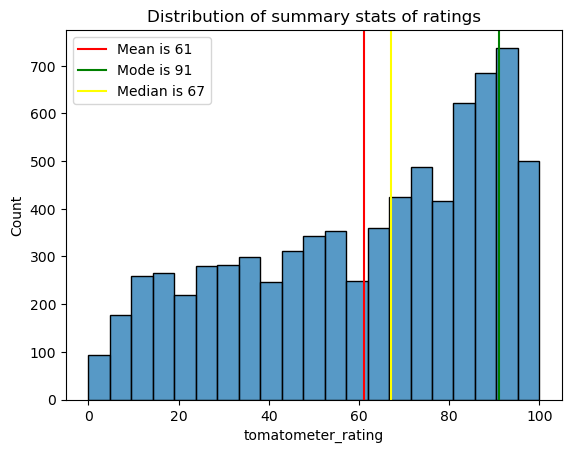

In [502]:
sb.histplot(data['tomatometer_rating'])
plt.axvline(x = mean, color = 'red', linestyle = '-', label = 'Mean is 61')
plt.axvline(x = mode, color = 'green', linestyle = '-', label = 'Mode is 91')
plt.axvline(x = median, color = 'yellow', linestyle = '-', label = 'Median is 67')
plt.legend()
plt.title('Distribution of summary stats of ratings')
plt.show()

In [504]:
sum_stats = data.groupby(['tomatometer_rating'])['movie_title'].count().reset_index(name = 'Num_movies')
print(sum_stats)
agg_values = sum_stats['tomatometer_rating'].apply(lambda y:'median' if y == median else('mean' if y == mean else('mode' if y == mode else 'Count of raters')))
print(agg_values)

     tomatometer_rating  Num_movies
0                     0          25
1                     1           6
2                     2          11
3                     3          19
4                     4          32
..                  ...         ...
96                   96         134
97                   97         119
98                   98         100
99                   99          29
100                 100         119

[101 rows x 2 columns]
0      Count of raters
1      Count of raters
2      Count of raters
3      Count of raters
4      Count of raters
            ...       
96     Count of raters
97     Count of raters
98     Count of raters
99     Count of raters
100    Count of raters
Name: tomatometer_rating, Length: 101, dtype: object


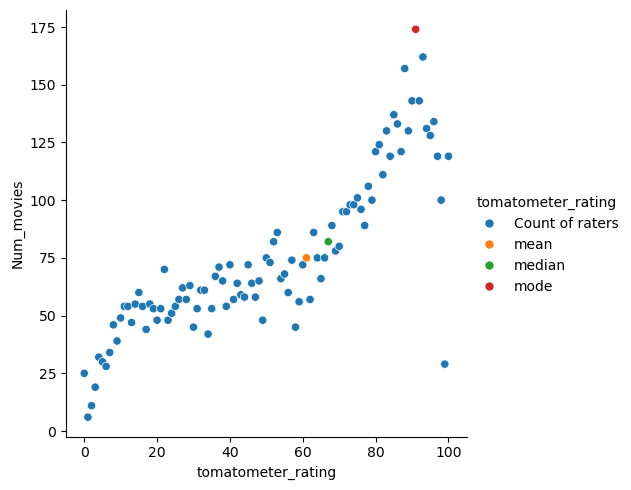

In [506]:
sb.relplot(data = sum_stats,x = 'tomatometer_rating',hue = agg_values,y = 'Num_movies',kind ='scatter')
plt.show()

In [508]:
data.describe()

,tomatometer_rating,tomatometer_count
count,7610.000000,7610.000000
mean,61.312352,101.143101
std,27.638312,72.922055
min,0.000000,5.000000
25%,39.000000,44.000000
50%,67.000000,80.000000
75%,86.000000,141.000000
max,100.000000,497.000000


In [510]:
data_rating_Q3 = 86
top_rated = data[(data['tomatometer_rating'] > data_rating_Q3) & (data['tomatometer_status'] == 'Certified Fresh')]
top_rated.describe()


,tomatometer_rating,tomatometer_count
count,1395.000000,1395.000000
mean,92.774194,125.726882
std,3.630521,90.781933
min,87.000000,39.000000
25%,90.000000,56.000000
50%,93.000000,90.000000
75%,96.000000,172.000000
max,100.000000,496.000000


In [512]:
top_rated_rating_Q3 = 96
top_rated = top_rated[top_rated['tomatometer_rating'] > top_rated_rating_Q3]
print(top_rated)

      tomatometer_rating                                              genre  \
7243                  97              Action & Adventure, Animation, Comedy   
7244                  97  Action & Adventure, Animation, Comedy, Cult Mo...   
7245                  97  Action & Adventure, Animation, Comedy, Drama, ...   
7246                  97  Action & Adventure, Animation, Comedy, Kids & ...   
7247                  97  Action & Adventure, Animation, Comedy, Kids & ...   
...                  ...                                                ...   
7601                 100                                              Drama   
7602                 100                                              Drama   
7605                 100                          Drama, Mystery & Suspense   
7606                 100                          Drama, Mystery & Suspense   
7607                 100                                     Drama, Romance   

     tomatometer_status                  movie_titl

In [514]:
top_rated.describe()

,tomatometer_rating,tomatometer_count
count,258.000000,258.000000
mean,98.201550,107.267442
std,1.083156,87.273365
min,97.000000,40.000000
25%,97.000000,50.250000
50%,98.000000,69.000000
75%,99.000000,125.000000
max,100.000000,487.000000


In [516]:
top_rated2_rating_Q3 = 99
top_rated_data = top_rated[top_rated['tomatometer_rating'] > top_rated2_rating_Q3]
top_rated_data.describe()

,tomatometer_rating,tomatometer_count
count,51.0,51.000000
mean,100.0,64.019608
std,0.0,39.141022
min,100.0,41.000000
25%,100.0,45.000000
50%,100.0,52.000000
75%,100.0,61.000000
max,100.0,235.000000


In [540]:
top_genres = top_rated_data.groupby(['genre'])['tomatometer_count'].sum().reset_index()
print(top_genres)

                                                genre  tomatometer_count
0   Action & Adventure, Art House & International,...                 61
1        Action & Adventure, Classics, Drama, Western                 46
2               Action & Adventure, Classics, Romance                 46
3               Action & Adventure, Classics, Western                 41
4       Action & Adventure, Science Fiction & Fantasy                 61
5                    Animation, Comedy, Kids & Family                492
6   Animation, Kids & Family, Musical & Performing...                 51
7   Art House & International, Classics, Cult Movi...                 51
8          Art House & International, Classics, Drama                103
9                   Art House & International, Comedy                 53
10  Art House & International, Documentary, Specia...                 54
11                   Art House & International, Drama                316
12  Art House & International, Drama, Mystery & Su.

In [542]:
top_movies = top_rated_data.groupby(['movie_title'])['tomatometer_count'].sum().reset_index()


In [544]:
top_movies.describe()

,tomatometer_count
count,51.000000
mean,64.019608
std,39.141022
min,41.000000
25%,45.000000
50%,52.000000
75%,61.000000
max,235.000000


In [546]:
tomatometer_count_Q3 = 61
top_movies = top_movies[top_movies['tomatometer_count'] >= tomatometer_count_Q3]
print(top_movies)


                             movie_title  tomatometer_count
1                          All About Eve                 67
6                           Citizen Kane                 84
8                   Deliver Us from Evil                 72
10    GETT: The Trial of Viviane Amsalem                 77
14                  Knock Down the House                 86
16                                 Laura                 61
17                        Leave No Trace                220
23                          Paddington 2                235
25                                Poetry                 69
26                           Rear Window                 66
29  Seven Samurai (Shichinin no Samurai)                 61
32                 Taxi to the Dark Side                 93
41                The Philadelphia Story                 61
43                        The Terminator                 61
48                             Toy Story                 88
49                           Toy Story 2

In [548]:
max_average = (top_movies['tomatometer_count'].sum() / top_movies['tomatometer_count'].count())
max_average = top_movies['max_average'] = top_movies['tomatometer_count'].apply(lambda x: 'Most_rated' if x > max_average else 'Not most rated')
print(max_average)

1     Not most rated
6     Not most rated
8     Not most rated
10    Not most rated
14    Not most rated
16    Not most rated
17        Most_rated
23        Most_rated
25    Not most rated
26    Not most rated
29    Not most rated
32    Not most rated
41    Not most rated
43    Not most rated
48    Not most rated
49        Most_rated
Name: tomatometer_count, dtype: object


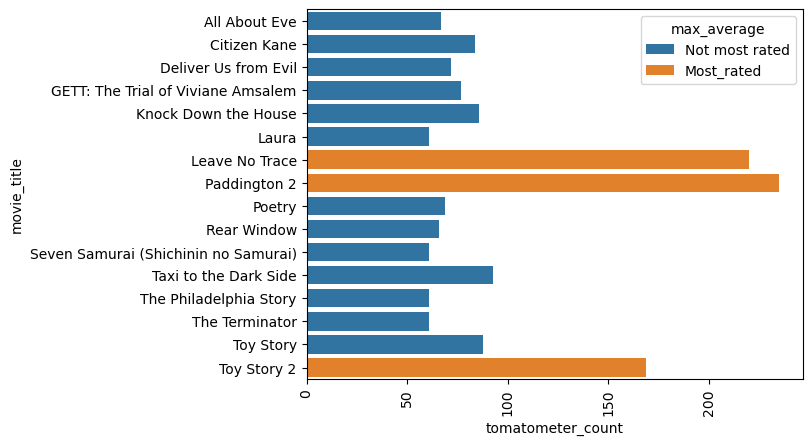

In [551]:
sb.barplot(x = 'tomatometer_count', y = 'movie_title',hue = 'max_average',  data = top_movies)
plt.xticks(rotation = 90)
plt.show()

In [553]:
top_genres.to_csv('Top_genres.csv', index = False)
top_movies.to_csv('Top_Movies.csv', index = False)
data.to_csv('data.csv', index = False)